# Gaussian Naive Bayes

Load Pandas, plotting and [Sklearn](https://scikit-learn.org/stable/) packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing

## Tennis Example

In [2]:
temp =  [ 54, 63, 81, 72, 68, 59, 83, 99, 66, 42, 103, 98, 80 ]
humidity = [ 40, 42, 60, 28, 70, 40, 43, 67, 20, 35, 70, 75, 30 ]
play = [ 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1 ]

In [3]:
#Combine weather and temp into data frame
my_dict = {'Temp': temp,
           'Humidity': humidity,
           'Play': play,
           }
features = pd.DataFrame(my_dict)
features

,Temp,Humidity,Play
0,54,40,1
1,63,42,1
2,81,60,0
3,72,28,1
4,68,70,1
5,59,40,1
6,83,43,1
7,99,67,0
8,66,20,1
9,42,35,1


In [4]:
features[ ["Humidity"] ]

,Humidity
0,40
1,42
2,60
3,28
4,70
5,40
6,43
7,67
8,20
9,35


In [5]:
features[["Humidity","Temp"]]

,Humidity,Temp
0,40,54
1,42,63
2,60,81
3,28,72
4,70,68
5,40,59
6,43,83
7,67,99
8,20,66
9,35,42


In [6]:
# Initialize a GNB model
model = GaussianNB()
# Fit the model
predictors = features[["Humidity","Temp"]]  # <= data frame
target = features["Play"]  # <= data series

model.fit(predictors, target) ;


In [7]:
# Predict
predicted = model.predict([[70,100]]) #70% humidity, 100 degress
print("Predicted Value:", predicted) #1: Yes, 0: No

Predicted Value: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [8]:
# Predict
predicted = model.predict([[35,80]]) #70% humidity, 100 degress
print("Predicted Value:", predicted) #1: Yes, 0: No

Predicted Value: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


## Iris Example

Use dataset "Iris" from the Sklearn package.

In [9]:
dataset = datasets.load_iris()

Examine data from dataset "Iris".

In [10]:
# Look at features
iris_data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
iris_data.shape

(150, 4)

In [12]:
# Look at response
y = dataset.target
print(y)
print(dataset.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


Plot histograms of predictors

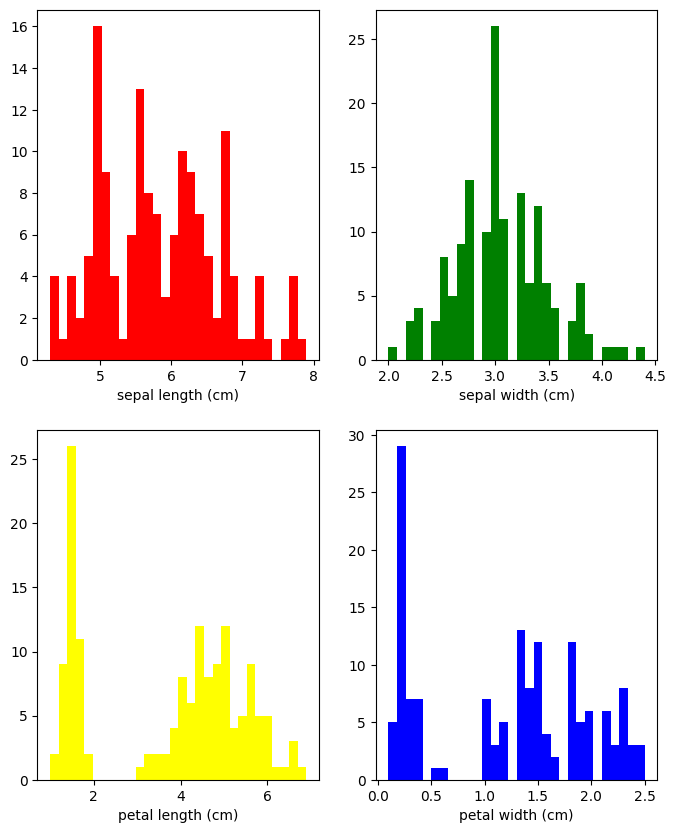

In [13]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (8,10))
colors = ['red', 'green', 'yellow', 'blue']
n = 0
for i in range(2):
  for j in range(2):
    column = dataset.feature_names[n]
    axs[i,j].hist(iris_data[column], color = colors[n], bins=30)
    axs[i,j].set_xlabel(column)
    n += 1

Plot scatter plots of certain predictors

Text(0, 0.5, 'sepal width (cm)')

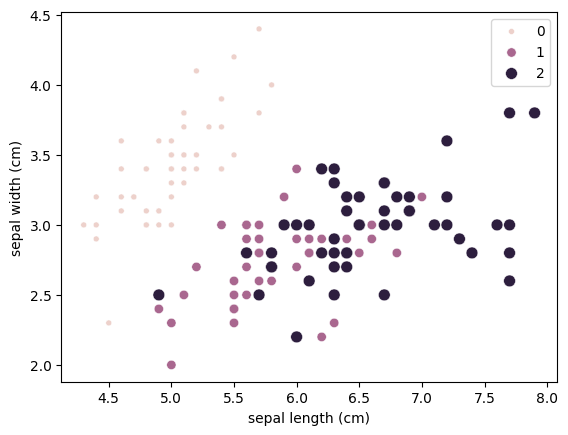

In [14]:
sns.scatterplot(x = iris_data['sepal length (cm)'], y = iris_data['sepal width (cm)'], hue = y, size = y)
plt.xlabel(dataset.feature_names[0])
plt.ylabel(dataset.feature_names[1])

Text(0, 0.5, 'petal width (cm)')

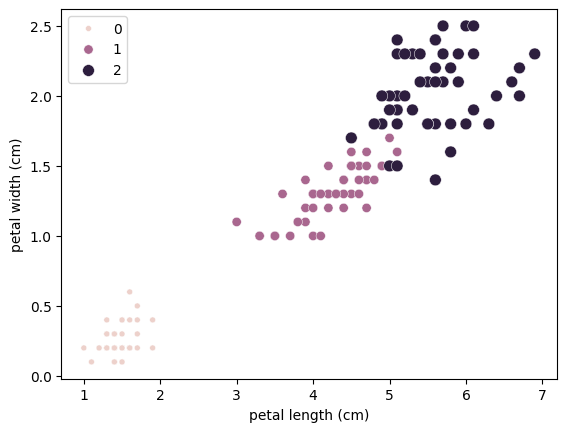

In [15]:
sns.scatterplot(x = iris_data['petal length (cm)'], y = iris_data['petal width (cm)'], hue = y, size = y)
plt.xlabel(dataset.feature_names[2])
plt.ylabel(dataset.feature_names[3])

Create a correlation plot of predictors

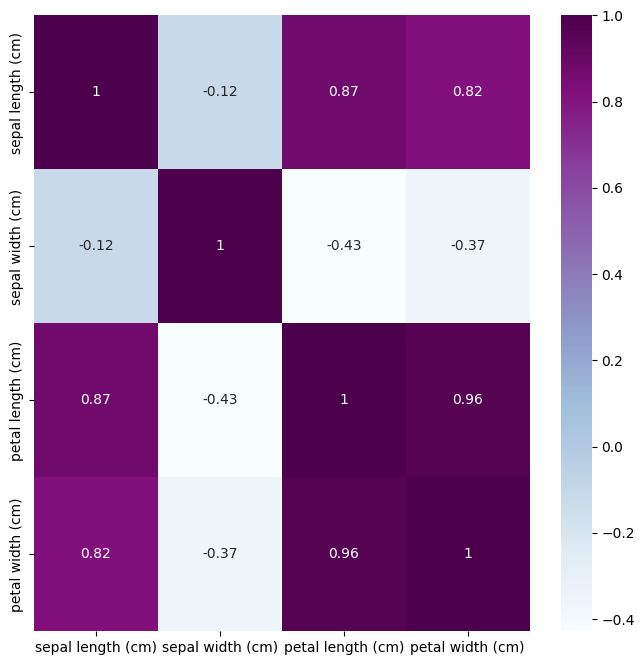

In [16]:
column_correlations = iris_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(column_correlations, annot=True, cmap='BuPu', xticklabels = dataset.feature_names, yticklabels = dataset.feature_names);

Note that petal many of the predictors are correlated. GNB assumes the predictors are uncorrelated, but it is generally robust even if they are correlated. Let's see how it performs.

### Gaussian Naive Bayes
Define a Gaussian Naive Bayes model and use the data to train it.

In [17]:
# Initialize a GNB model
model = GaussianNB()

In [18]:
# Fit the model
model.fit(iris_data,y) ;

### Predictions for the same training set

In [19]:
predicted_y = model.predict(iris_data)

In [20]:
predicted_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
(predicted_y - y) * 100

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,  100,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,  100,    0,    0,    0,    0,    0,    0,
        100,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0, -100,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0, -100,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0, -100,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0])

In [31]:
(len(y)-6)/len(y)*100

96.0

In [29]:
 np.array([1, 2, 3]) - np.array([1, 2, 3, 4])

ValueError: operands could not be broadcast together with shapes (3,) (4,) 

### Confusion matrix for the results.

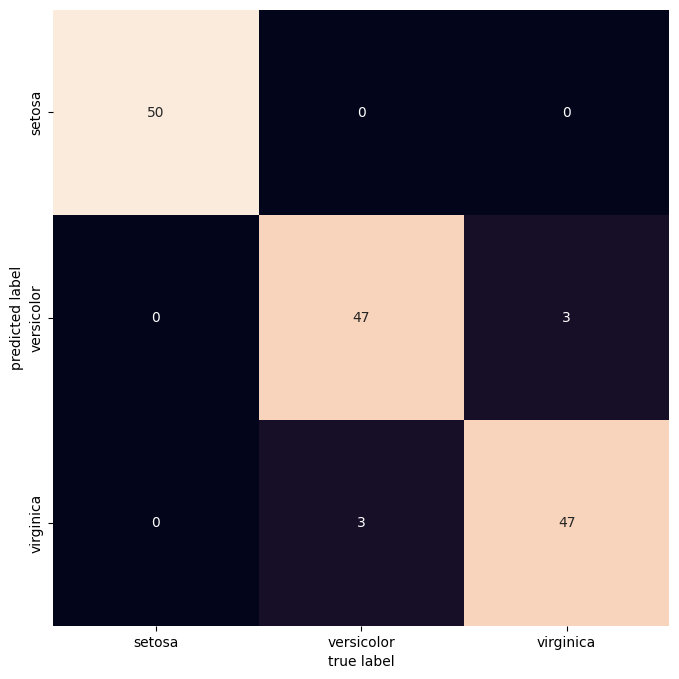

In [ ]:
plt.figure(figsize=(8,8))
mat = metrics.confusion_matrix(y,predicted_y)
sns.heatmap(mat.T,
            square=True,
            annot=True,
            fmt='d',
            cbar=False,
            xticklabels=dataset.target_names,
            yticklabels=dataset.target_names
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

Calculate the classification accuracy.

In [ ]:
metrics.accuracy_score(y,predicted_y)


0.96

### Split the training data into training set and testing set.

In [32]:
import sklearn.model_selection as model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(iris_data,y,test_size=0.25)

### Verify
Verify the training and test data sizes are consistent with the original training data set.

In [33]:
X_train.shape

(112, 4)

In [ ]:
y_train.shape

(112,)

In [ ]:
X_test.shape

(38, 4)

In [ ]:
y_test.shape

(38,)

### Cross-validation

In [42]:
# One way
n = 5000
results = np.zeros(n)
results

for idx in range(n):
  X_train, X_test, y_train, y_test = model_selection.train_test_split(iris_data,y,test_size=0.25)
  model = GaussianNB()
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  results[idx] = metrics.accuracy_score(y_test,y_pred)

print(results.mean())


0.9538157894736842


In [44]:
results.min(), results.max()

(0.7894736842105263, 1.0)

In [41]:
results

array([1.        , 0.92105263, 0.97368421, 0.94736842, 0.94736842,
       0.94736842, 0.94736842, 0.92105263, 0.92105263, 0.94736842,
       0.92105263, 1.        , 0.92105263, 1.        , 0.94736842,
       0.97368421, 0.97368421, 0.97368421, 0.97368421, 0.97368421,
       1.        , 0.92105263, 0.97368421, 0.94736842, 0.94736842,
       0.97368421, 0.97368421, 0.92105263, 0.94736842, 0.92105263,
       1.        , 0.94736842, 0.92105263, 0.94736842, 1.        ,
       1.        , 0.94736842, 0.92105263, 0.94736842, 1.        ,
       0.92105263, 0.97368421, 0.97368421, 1.        , 0.97368421,
       0.94736842, 0.94736842, 0.97368421, 0.92105263, 0.97368421])

In [45]:
# Easier way
from sklearn.model_selection import cross_val_score
results = cross_val_score(model, iris_data, y, scoring='accuracy', cv = 10)
acc = results.mean()
acc

0.9533333333333334